Load data

In [2]:
import pandas as pd

# Load datasets
cab_data = pd.read_csv('Data/DataSets-main/Cab_Data.csv')
customer_data = pd.read_csv('Data/DataSets-main/Customer_ID.csv')
transaction_data = pd.read_csv('Data/DataSets-main/Transaction_ID.csv')
city_data = pd.read_csv('Data/DataSets-main/City.csv')

# Display the first few rows of each dataset
print(cab_data.head())
print(customer_data.head())
print(transaction_data.head())
print(city_data.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

# 1 Data Preprocessing

First of all, to fill the data intake report, we need some basic information of it

In [4]:
print(cab_data.shape)
print(customer_data.shape)
print(transaction_data.shape)
print(city_data.shape)

(359392, 7)
(49171, 4)
(440098, 3)
(20, 3)


In [17]:
import os

# Define the paths to your CSV files
files = ['Cab_Data.csv', 'Customer_ID.csv', 'Transaction_ID.csv', 'City.csv']

# Function to get the size of a file in bytes and megabytes
def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    size_megabytes = size_bytes / (1024 * 1024)
    return size_bytes, size_megabytes

# Get and print the size of each file
for file in files:
    file_path = 'Data/DataSets-main/'+ file
    size_bytes, size_megabytes = get_file_size(file_path)
    print(f"Size of {file}: {size_bytes} bytes ({size_megabytes:.2f} MB)")


Size of Cab_Data.csv: 21158610 bytes (20.18 MB)
Size of Customer_ID.csv: 1051215 bytes (1.00 MB)
Size of Transaction_ID.csv: 8998194 bytes (8.58 MB)
Size of City.csv: 759 bytes (0.00 MB)


Second, we Check the field names and data types. Identify missing values.

In [19]:
# Check data types and missing values
print(cab_data.info())
print(customer_data.info())
print(transaction_data.info())
print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

So, we know that there is no missing values in these four tables. Then, we nned to handle the duplicates and outliers

In [25]:
cab_data = cab_data.drop_duplicates()
customer_data = customer_data.drop_duplicates()
transaction_data = transaction_data.drop_duplicates()
city_data = city_data.drop_duplicates()

In [27]:
# this means no duplicate data
print(cab_data.shape)
print(customer_data.shape)
print(transaction_data.shape)
print(city_data.shape)

(359392, 7)
(49171, 4)
(440098, 3)
(20, 3)


In [30]:
# Display basic information and descriptive statistics
def display_info_and_stats(df, name):
    # print(f"--- {name} Info ---")
    # print(df.info(), "\n")
    print(f"--- {name} Descriptive Statistics ---")
    print(df.describe(include='all'), "\n")

# Display information and statistics for each dataset
display_info_and_stats(cab_data, "Cab_Data")
display_info_and_stats(customer_data, "Customer_ID")
display_info_and_stats(transaction_data, "Transaction_ID")
display_info_and_stats(city_data, "City")

--- Cab_Data Descriptive Statistics ---
        Transaction ID  Date of Travel     Company         City  \
count     3.593920e+05   359392.000000      359392       359392   
unique             NaN             NaN           2           19   
top                NaN             NaN  Yellow Cab  NEW YORK NY   
freq               NaN             NaN      274681        99885   
mean      1.022076e+07    42964.067998         NaN          NaN   
std       1.268058e+05      307.467197         NaN          NaN   
min       1.000001e+07    42371.000000         NaN          NaN   
25%       1.011081e+07    42697.000000         NaN          NaN   
50%       1.022104e+07    42988.000000         NaN          NaN   
75%       1.033094e+07    43232.000000         NaN          NaN   
max       1.044011e+07    43465.000000         NaN          NaN   

         KM Travelled  Price Charged   Cost of Trip  
count   359392.000000  359392.000000  359392.000000  
unique            NaN            NaN           

From the above, I concluded that there are no outliers since all the data seems reasonable, except that one customer paid $1000 more than his/her trip cost. To explain this, I added two features: Tips = Price Charged - Cost of Trip, and Tips_percent = Tips / Cost of Trip. This "tips" may not only constrained to tips, but it may also include highway fees, waiting fees, service fees, etc.

In addition, I noticed that there is a feature named "Date of Travel", and its maximum minus its minimum is close to three years in terms of days. So I assume its value represents the order of time. As for which day the numbers themselves represent, I won't make too many judgments

In [36]:
# Adding new features: Tips and Tips_percent
cab_data['Tips'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data['Tips_percent'] = cab_data['Tips'] / cab_data['Cost of Trip']
print(cab_data.describe())

       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip           Tips   Tips_percent  
count  359392.000000  359392.000000  359392.000000  
mean      286.190113     137.253198       0.475231  
std       157.993661     160.311840       0.425715  
min        19.000000    -220.060000      -0.409338  
25%       151.200000      28.012000       0.160845  
50%       282.480000      81.962000       

Since the tips should not be less than zero, so I deleted the row with Tips < 0. 

In [38]:
# Remove rows where Tips < 0
cab_data = cab_data[cab_data['Tips'] >= 0]

# Display the dataframe after removing negative tips
print("After removing negative tips:")
print(cab_data.describe(include='all'))

After removing negative tips:
        Transaction ID  Date of Travel     Company         City  \
count     3.345730e+05   334573.000000      334573       334573   
unique             NaN             NaN           2           19   
top                NaN             NaN  Yellow Cab  NEW YORK NY   
freq               NaN             NaN      260991        99432   
mean      1.022056e+07    42963.257758         NaN          NaN   
std       1.269879e+05      308.072058         NaN          NaN   
min       1.000001e+07    42371.000000         NaN          NaN   
25%       1.011085e+07    42697.000000         NaN          NaN   
50%       1.022150e+07    42988.000000         NaN          NaN   
75%       1.032994e+07    43230.000000         NaN          NaN   
max       1.044011e+07    43465.000000         NaN          NaN   

         KM Travelled  Price Charged   Cost of Trip           Tips  \
count   334573.000000  334573.000000  334573.000000  334573.000000   
unique            NaN    

# 2 Data Transformation and Integration

 Then, we can merge some tables based on Customer ID, Transaction ID, and City to create a master dataset.

In [39]:
# Merge cab_data with transaction_data on 'Transaction_ID'
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')

# Merge the result with customer_data on 'Customer_ID'
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

# Merge the result with city_data on 'City'
merged_data = pd.merge(merged_data, city_data, on='City')

# Display the merged data
print(merged_data.head())


   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip      Tips  Tips_percent  Customer ID  \
0         370.95      313.6350   57.3150      0.182744        29290   
1         598.70      317.4228  281.2772      0.886128        29290   
2         792.05      597.4020  194.6480      0.325824        29290   
3         358.52      334.8540   23.6660      0.070676        27703   
4         721.10      467.1192  253.9808      0.543717        27703   

  Payment_Mode Gender  Age  Income (USD/Month) Population     Users  
0         Card   Male   28               10813   814

In [40]:
print(merged_data.shape)

(334573, 16)


In [41]:
# Save the merged dataset to a new CSV file
output_path = 'Data/merged_data.csv'
merged_data.to_csv(output_path, index=False)

Know, we have a table that have 359 thouthands rows with 14 features.

# 3 Exploratory Data Analysis

Before doing the EDA, I need to clarify the problems I want to solve and the conclusion I want to draw:
1. The changes in customer traffic and total revenue of these two companies over time
2. Which city has the highest number of customers and the average price of fees charged to each customer
3. Which city do these two cab companies primarily operate in
4. Which city do wealthy people live in, and which company's car do they take
5. Which company has a higher total taxi mileage
6. Is the proportion of tipping higher for long-distance trips and wealthy people
   
After answering these six questions, I think I can comprehensively analyze these two companies and give reasonable and wise advice to XYZ’s Executive team.

In [ ]:
import pandas as pd

# Load the merged dataset (replace with your actual merged dataset path)
merged_data = pd.read_csv('Data/merged_data.csv')

## 3.1 The changes in customer traffic and total revenue of these two companies over time

In [43]:
# Convert "Date of Travel" from int to datetime
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'], origin='1899-12-30', unit='D')

# Display the first few rows to check the conversion
print(merged_data.head())

   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip      Tips  Tips_percent  Customer ID  \
0         370.95      313.6350   57.3150      0.182744        29290   
1         598.70      317.4228  281.2772      0.886128        29290   
2         792.05      597.4020  194.6480      0.325824        29290   
3         358.52      334.8540   23.6660      0.070676        27703   
4         721.10      467.1192  253.9808      0.543717        27703   

  Payment_Mode Gender  Age  Income (USD/Month) Population     Users  
0         Card   Male   28               10813   814,885  

In [45]:
# Group by Company and Date of Travel to calculate customer traffic and total revenue
traffic_revenue = merged_data.groupby(['Company', 'Date of Travel']).agg({
    'Transaction ID': 'count',  # Customer traffic
    'Price Charged': 'sum'      # Total revenue
}).reset_index()

# Rename columns for clarity
traffic_revenue.columns = ['Company', 'Date of Travel', 'Customer Traffic', 'Total Revenue']

# Display the first few rows of the result
print(traffic_revenue.head())


    Company Date of Travel  Customer Traffic  Total Revenue
0  Pink Cab     2016-01-02                37       13194.81
1  Pink Cab     2016-01-03                52       25375.33
2  Pink Cab     2016-01-04                 4        1266.07
3  Pink Cab     2016-01-05                 5        2210.20
4  Pink Cab     2016-01-06                21        7663.90


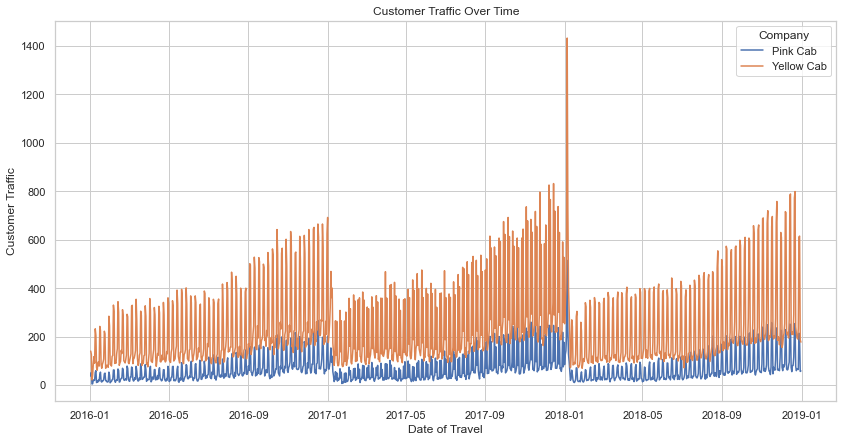

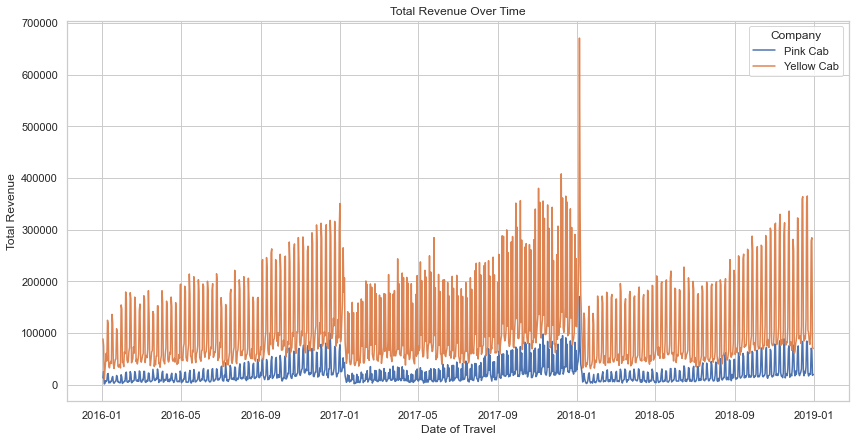

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot customer traffic over time for each company
plt.figure(figsize=(14, 7))
sns.lineplot(data=traffic_revenue, x='Date of Travel', y='Customer Traffic', hue='Company')
plt.title('Customer Traffic Over Time')
plt.xlabel('Date of Travel')
plt.ylabel('Customer Traffic')
plt.legend(title='Company')
plt.show()

# Plot total revenue over time for each company
plt.figure(figsize=(14, 7))
sns.lineplot(data=traffic_revenue, x='Date of Travel', y='Total Revenue', hue='Company')
plt.title('Total Revenue Over Time')
plt.xlabel('Date of Travel')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.show()

Analysis: From the figures above, we can see the superiority of the Yellow Cab over the Pink Cab in terms of total revenue or customer traffic.
And the tread increases monotonically within a year. We can see that the second half of each year is the peak period for users to use cars, which is also the peak period for companies to make money. This peak is particularly evident in December every year, primarily attributed to the arrival of holidays such as Christmas and Thanksgiving.

Conclusion: I think just from this comparison, I can responsibly tell XYZ’s Executive team that if they want to invest, invest in the Yellow Cab company. So my suggestions below will focus on how to profit from it and what points to consider. So first of all, We can increase the year-end traffic volume, provide better subsidies to drivers, and offer better discounts to passengers. On the one hand, it can increase revenue, and on the other hand, it can better consolidate customer sources.

## 3.2 Which city has the highest number of customers and the average price of fees charged to each customer

In [50]:
# Calculate the number of unique customers per city
customers_per_city = merged_data.groupby('City')['Customer ID'].nunique().reset_index()
customers_per_city.columns = ['City', 'Number of Customers']

# Rank the cities by the number of customers
customers_per_city['Customer Rank'] = customers_per_city['Number of Customers'].rank(method='dense', ascending=False)

# Sort by rank
customers_per_city = customers_per_city.sort_values(by='Customer Rank')

# Display the ranked cities by number of customers
print("Ranked cities by number of customers:")
print(customers_per_city)

Ranked cities by number of customers:
              City  Number of Customers  Customer Rank
9      NEW YORK NY                 3000            1.0
6   LOS ANGELES CA                 3000            1.0
3       CHICAGO IL                 3000            1.0
18   WASHINGTON DC                 3000            1.0
2        BOSTON MA                 3000            1.0
14    SAN DIEGO CA                 2997            2.0
16  SILICON VALLEY                 2827            3.0
0       ATLANTA GA                 2751            4.0
15      SEATTLE WA                 2722            5.0
4        DALLAS TX                 2680            6.0
7         MIAMI FL                 2645            7.0
1        AUSTIN TX                 2377            8.0
10   ORANGE COUNTY                 2154            9.0
5        DENVER CO                 2022           10.0
8     NASHVILLE TN                 1603           11.0
13   SACRAMENTO CA                 1383           12.0
11      PHOENIX AZ         

In [51]:
# Calculate the average price charged to each customer per city
average_price_per_city = merged_data.groupby('City')['Price Charged'].mean().reset_index()
average_price_per_city.columns = ['City', 'Average Price Charged']

# Rank the cities by average price charged
average_price_per_city['Price Rank'] = average_price_per_city['Average Price Charged'].rank(method='dense', ascending=False)

# Sort by rank
average_price_per_city = average_price_per_city.sort_values(by='Price Rank')

# Display the ranked cities by average price charged
print("Ranked cities by average price charged:")
print(average_price_per_city)


Ranked cities by average price charged:
              City  Average Price Charged  Price Rank
9      NEW YORK NY             571.704247         1.0
4        DALLAS TX             467.589033         2.0
16  SILICON VALLEY             434.945199         3.0
7         MIAMI FL             407.914241         4.0
5        DENVER CO             406.979002         5.0
0       ATLANTA GA             401.895435         6.0
10   ORANGE COUNTY             398.995056         7.0
1        AUSTIN TX             390.490363         8.0
11      PHOENIX AZ             386.342672         9.0
18   WASHINGTON DC             381.373300        10.0
6   LOS ANGELES CA             378.263971        11.0
12   PITTSBURGH PA             375.647973        12.0
15      SEATTLE WA             369.738720        13.0
17       TUCSON AZ             364.683452        14.0
3       CHICAGO IL             362.546226        15.0
2        BOSTON MA             359.824700        16.0
14    SAN DIEGO CA             354.534147 

In [52]:
# Merge the results to get both number of customers and average price charged per city along with ranks
city_summary = pd.merge(customers_per_city, average_price_per_city, on='City')

# Display the combined ranking
print("City summary with ranks:")
print(city_summary)

City summary with ranks:
              City  Number of Customers  Customer Rank  Average Price Charged  \
0      NEW YORK NY                 3000            1.0             571.704247   
1   LOS ANGELES CA                 3000            1.0             378.263971   
2       CHICAGO IL                 3000            1.0             362.546226   
3    WASHINGTON DC                 3000            1.0             381.373300   
4        BOSTON MA                 3000            1.0             359.824700   
5     SAN DIEGO CA                 2997            2.0             354.534147   
6   SILICON VALLEY                 2827            3.0             434.945199   
7       ATLANTA GA                 2751            4.0             401.895435   
8       SEATTLE WA                 2722            5.0             369.738720   
9        DALLAS TX                 2680            6.0             467.589033   
10        MIAMI FL                 2645            7.0             407.914241   
11 

Analysis: NEW YORK, NY; LOS ANGELES, CA; CHICAGO, IL; WASHINGTON, DC; and BOSTON, MA,Nboth have the highest customer numbers, 3000. NEW YORK has the highest average price of fees charged to each customer: 571.7, which is quite higher than the second city, DALLAS, 467.6. 

Conclusion: We can classify NEW YORK, NY; LOS ANGELES, CA; CHICAGO, IL; WASHINGTON, DC; BOSTON, MA, and SAN DIEGO, CA as first-class cities; they all have nearly the same highest customer number. Among them, New York is undoubtedly the most eye-catching. This city has generated the highest consumption of taxi passengers; it is the place that can make the most money, but consequently, the drivers' salaries will also be higher. But whatever, if XYZ wants to make more money, it can not miss up New York and these first-class cities. MA 

## 3.3 Which city do these two cab companies primarily operate in

In [53]:
# Calculate the number of transactions for each company in each city
transactions_per_city = merged_data.groupby(['Company', 'City']).size().reset_index(name='Number of Transactions')

# Identify the city with the highest number of transactions for each company
primary_city_per_company = transactions_per_city.loc[transactions_per_city.groupby('Company')['Number of Transactions'].idxmax()]

# Display the primary cities for each company
print("Primary cities for each company:")
print(primary_city_per_company)

Primary cities for each company:
       Company            City  Number of Transactions
6     Pink Cab  LOS ANGELES CA                   17500
28  Yellow Cab     NEW YORK NY                   85918


In [54]:
# Rank the cities by the number of transactions for each company
transactions_per_city['City Rank'] = transactions_per_city.groupby('Company')['Number of Transactions'].rank(method='dense', ascending=False)

# Sort by company and rank
transactions_per_city = transactions_per_city.sort_values(by=['Company', 'City Rank'])

# Display the ranked cities by number of transactions for each company
print("Ranked cities by number of transactions for each company:")
print(transactions_per_city)

Ranked cities by number of transactions for each company:
       Company            City  Number of Transactions  City Rank
6     Pink Cab  LOS ANGELES CA                   17500        1.0
9     Pink Cab     NEW YORK NY                   13514        2.0
14    Pink Cab    SAN DIEGO CA                    9750        3.0
3     Pink Cab      CHICAGO IL                    7155        4.0
2     Pink Cab       BOSTON MA                    4452        5.0
16    Pink Cab  SILICON VALLEY                    3680        6.0
18    Pink Cab   WASHINGTON DC                    3263        7.0
15    Pink Cab      SEATTLE WA                    2158        8.0
7     Pink Cab        MIAMI FL                    1729        9.0
1     Pink Cab       AUSTIN TX                    1719       10.0
0     Pink Cab      ATLANTA GA                    1485       11.0
10    Pink Cab   ORANGE COUNTY                    1346       12.0
8     Pink Cab    NASHVILLE TN                    1291       13.0
13    Pink Cab   S

Analysis: Yellow Cab primarily operates in New York, while Pink Can in Los Angeles.

Conclusion: Yeah! Yellow Cab Company once again demonstrates its strategic vision. It chooses to take more passengers in New York so they can make more money! But, I think there is considerable passenger flow in first-class cities for both companies, and this is good news.

## 3.4 Which city do wealthy people live in, and which company's car do they take

In [55]:
# Calculate the average income per city
average_income_per_city = merged_data.groupby('City')['Income (USD/Month)'].mean().reset_index()
average_income_per_city.columns = ['City', 'Average Income']

# Identify the wealthiest city based on average income
wealthiest_city = average_income_per_city.loc[average_income_per_city['Average Income'].idxmax()]
print("Wealthiest city based on average income:")
print(wealthiest_city)

# Filter the data for the wealthiest city
data_wealthiest_city = merged_data[merged_data['City'] == wealthiest_city['City']]

# Calculate the number of transactions for each company in the wealthiest city
transactions_per_company_in_wealthiest_city = data_wealthiest_city.groupby('Company').size().reset_index(name='Number of Transactions')

# Identify the company with the highest number of transactions in the wealthiest city
primary_company_in_wealthiest_city = transactions_per_company_in_wealthiest_city.loc[transactions_per_company_in_wealthiest_city['Number of Transactions'].idxmax()]
print(f"Company primarily taken by people in {wealthiest_city['City']}:")
print(primary_company_in_wealthiest_city)

Wealthiest city based on average income:
City              SACRAMENTO CA
Average Income     15324.488108
Name: 13, dtype: object
Company primarily taken by people in SACRAMENTO CA:
Company                   Pink Cab
Number of Transactions        1026
Name: 0, dtype: object


In [59]:
# Rank the cities by average income
average_income_per_city['Income Rank'] = average_income_per_city['Average Income'].rank(method='dense', ascending=False)

# Sort by rank
average_income_per_city = average_income_per_city.sort_values(by='Income Rank')

# Display the ranked cities by average income
print("Ranked cities by average income:")
print(average_income_per_city)

Ranked cities by average income:
              City  Average Income  Income Rank
13   SACRAMENTO CA    15324.488108          1.0
16  SILICON VALLEY    15251.804808          2.0
10   ORANGE COUNTY    15203.791578          3.0
9      NEW YORK NY    15183.228971          4.0
2        BOSTON MA    15124.715271          5.0
3       CHICAGO IL    15119.468785          6.0
6   LOS ANGELES CA    15056.013265          7.0
14    SAN DIEGO CA    15053.377029          8.0
11      PHOENIX AZ    15004.722865          9.0
5        DENVER CO    15002.960613         10.0
7         MIAMI FL    14981.297907         11.0
0       ATLANTA GA    14912.708229         12.0
4        DALLAS TX    14857.433050         13.0
17       TUCSON AZ    14850.166264         14.0
15      SEATTLE WA    14830.646821         15.0
18   WASHINGTON DC    14725.488652         16.0
1        AUSTIN TX    14677.977663         17.0
8     NASHVILLE TN    14596.296073         18.0
12   PITTSBURGH PA    14468.027636         19.0


In [65]:
# Select top N cities based on average income (for example, top 10 cities)
top_n = 10
top_cities = average_income_per_city.head(top_n)['City']

# Filter the merged data for these top cities
data_top_cities = merged_data[merged_data['City'].isin(top_cities)]

# Calculate the number of transactions for each combination of City and Company in the top cities
transactions_per_city_company_top = data_top_cities.groupby(['City', 'Company']).size().reset_index(name='Number of Transactions')

# # Sort by number of transactions in descending order within each city
# transactions_per_city_company_top = transactions_per_city_company_top.sort_values(by=['City', 'Number of Transactions'], ascending=[True, False])

# Display the transaction numbers for each company in the top cities
print(f"Transaction numbers for each company in the top {top_n} cities with more wealthy people:")
print(transactions_per_city_company_top)

Transaction numbers for each company in the top 10 cities with more wealthy people:
              City     Company  Number of Transactions
0        BOSTON MA    Pink Cab                    4452
1        BOSTON MA  Yellow Cab                   21492
2       CHICAGO IL    Pink Cab                    7155
3       CHICAGO IL  Yellow Cab                   41571
4        DENVER CO    Pink Cab                     926
5        DENVER CO  Yellow Cab                    2400
6   LOS ANGELES CA    Pink Cab                   17500
7   LOS ANGELES CA  Yellow Cab                   27505
8      NEW YORK NY    Pink Cab                   13514
9      NEW YORK NY  Yellow Cab                   85918
10   ORANGE COUNTY    Pink Cab                    1346
11   ORANGE COUNTY  Yellow Cab                    2406
12      PHOENIX AZ    Pink Cab                     645
13      PHOENIX AZ  Yellow Cab                    1170
14   SACRAMENTO CA    Pink Cab                    1026
15   SACRAMENTO CA  Yellow Cab      

Analysis: SACRAMENTO, CA's statistics of taxi passengers have the highest average income, while in this city, Pink Cab has 1026 transactions, larger than Yellow Cab's 824.

Conclusion: Although Pink Cab has some advantages in SACRAMENTO, CA, in other "wealthy" cities, Yellow Cab is superior. These statistics can not fully represent the wealthy people in that city because maybe the wealthiest people do not even take a taxi since they have their cars. What can be advised from this is that the Cab company can pay more attention to some cities that may not be so wealthy, these cities may have the richest people who take taxis the most.

## 3.5 Which company has a higher total taxi mileage

In [70]:
company_mile = merged_data.groupby(['Company']).agg({'KM Travelled': 'sum'}).reset_index()

company_mile.columns = ['Company', 'Company mileage']

print(company_mile)

      Company  Company mileage
0    Pink Cab       1663016.54
1  Yellow Cab       5889810.62


Analysis: Yellow Cab has a higher total taxi mileage (5889810) than Pink Cab (1663016), which is nearly 3.5 times.

Conclusion: On the one hand, this data reflects that Yellow Cab has a larger number of taxis, more mileage, a larger company scale, and more potential for investment. On the other hand, it also reflects that the quality of taxis is up to standard, and they can travel such a long distance without any problems. But at the same time, this also hides safety hazards, as a car will wear and tear with increasing mileage. This also reminds XYZ to conduct regular safety checks on vehicles.

## 3.6 Is the proportion of tipping higher for long-distance trips and wealthy people

In [76]:
wealthy_tip = merged_data.groupby(['Customer ID','Income (USD/Month)'])['Tips_percent'].mean().reset_index().sort_values(by='Income (USD/Month)',ascending=False)

distance_tip = merged_data.groupby(['Transaction ID','KM Travelled'])['Tips_percent'].mean().reset_index().sort_values(by='KM Travelled',ascending=False)
print(wealthy_tip.head())
print(distance_tip.head())

       Customer ID  Income (USD/Month)  Tips_percent
27297        31303               35000      0.239715
37663        51640               34996      0.274474
21543        24616               34996      0.923713
27865        32155               34995      0.473208
35164        45777               34995      0.449245
        Transaction ID  KM Travelled  Tips_percent
252656        10332254          48.0      0.487950
37238         10049702          48.0      0.189782
191163        10251909          48.0      1.362945
107525        10141113          48.0      0.593872
8701          10011507          48.0      0.952282


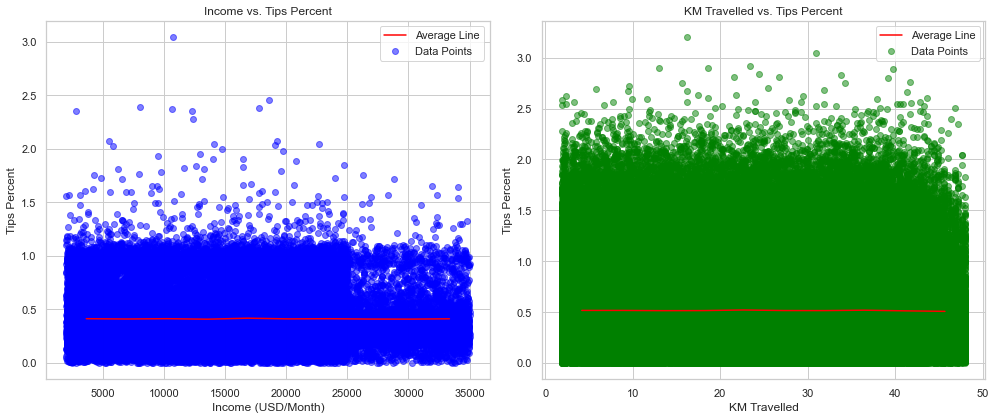

In [78]:
# Function to calculate binned averages
def bin_and_average(df, x_col, y_col, bins=10):
    df['bin'] = pd.cut(df[x_col], bins=bins)
    bin_means = df.groupby('bin')[y_col].mean().reset_index()
    bin_centers = [interval.mid for interval in bin_means['bin']]
    return bin_centers, bin_means[y_col]

# Plot 1: Income vs. Tips_percent
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(wealthy_tip['Income (USD/Month)'], wealthy_tip['Tips_percent'], color='blue', alpha=0.5, label='Data Points')
bin_centers, bin_means = bin_and_average(wealthy_tip, 'Income (USD/Month)', 'Tips_percent')
plt.plot(bin_centers, bin_means, color='red', label='Average Line')
plt.title('Income vs. Tips Percent')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Tips Percent')
plt.legend()

# Plot 2: KM Travelled vs. Tips_percent
plt.subplot(1, 2, 2)
plt.scatter(distance_tip['KM Travelled'], distance_tip['Tips_percent'], color='green', alpha=0.5, label='Data Points')
bin_centers, bin_means = bin_and_average(distance_tip, 'KM Travelled', 'Tips_percent')
plt.plot(bin_centers, bin_means, color='red', label='Average Line')
plt.title('KM Travelled vs. Tips Percent')
plt.xlabel('KM Travelled')
plt.ylabel('Tips Percent')
plt.legend()

plt.tight_layout()
plt.show()

Analysis: The tips rate seems unrelated to either KMs or customers' incomes.

Conclusion: This seems to be a misunderstanding of mine. The so called "tips" is not related to other features like incomes or KMs, it is a stable value given a large number of samples.

# Conclusion
Overall, I advise XYZ to invest in the Yellow Cab Company due to the following reasons:

Higher Profit Potential: Yellow Cab has shown consistently higher revenue, particularly in New York and other first-class cities such as Los Angeles, Chicago, Washington, Boston, and San Diego. These cities have the highest number of customers and the greatest potential for profit.

Strategic Market Presence: Yellow Cab has strategically targeted high-demand areas, especially New York, which has the highest consumption of taxi services. This approach ensures a steady and substantial revenue stream.

Operational Scale and Efficiency: Yellow Cab operates a larger fleet with greater mileage, indicating a robust and scalable operation. This demonstrates the company's capacity to handle high passenger volumes efficiently.

Customer and Driver Incentives: By increasing year-end traffic volume, providing better subsidies to drivers, and offering attractive discounts to passengers, Yellow Cab can enhance both revenue and customer loyalty.

Targeting Diverse Markets: While Pink Cab performs well in Sacramento, Yellow Cab dominates in other affluent cities. Focusing on both wealthy and less affluent cities can capture a broader customer base, as wealthier individuals in less affluent areas might rely more on taxi services.

Vehicle Maintenance and Safety: Regular safety checks are essential due to the extensive mileage covered by Yellow Cab’s fleet, ensuring safety and reliability while maintaining operational standards.

In summary, investing in Yellow Cab is a sound decision due to its strategic market presence, operational efficiency, and potential for higher returns.